# 包絡面定理について

## 一般の集合についての包絡面定理

参考：
* [ENVELOPE THEOREMS FOR ARBITRARY CHOICE SETS](https://web.stanford.edu/~isegal/envelope.pdf)
    * この論文は「方向微分」の導出をしてます．劣微分はまた別のトリックがいるかも．

今回は包絡面定理についての話です．$X=\{x_1, x_2, x_3\}$について，価値関数$V(t)=\max _{x \in X} f(x, t)$を考えましょう．
この$V(t)$は，関数$f(x, t)$の「upper envelope」になります（下の図参照）．

このUpper envelopeについて，Envelope theoremはその劣勾配を与えてくれます．

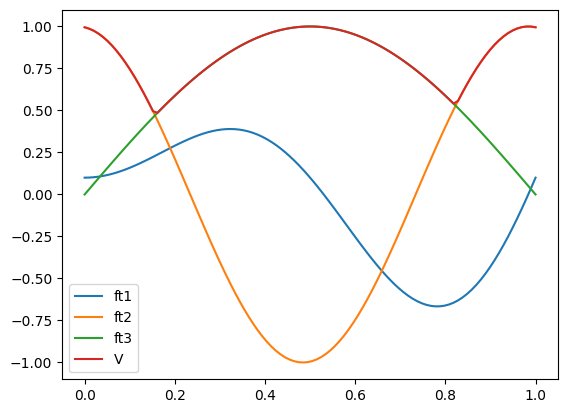

In [10]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 100)
ft1 = t * np.sin(2 * np.pi * t) + 0.1
ft2 = np.cos(2 * np.pi * t + 0.1)
ft3 = np.sin(1 * np.pi * t)
V = np.maximum(np.maximum(ft1, ft2), ft3)

plt.plot(t, ft1, label='ft1')
plt.plot(t, ft2, label='ft2')
plt.plot(t, ft3, label='ft3')
plt.plot(t, V, label='V')
plt.legend()

表記：
* $t \in [0, 1]$
* $f: X \times [0, 1] \to \mathbb{R}$
    * $t$はノルム付きベクトル空間としてもよい．その場合は方向微分を考える．
* $V(t)=\sup _{x \in X} f(x, t)$
* $X^*(t)=\{x \in X: f(x, t)=V(t)\}$

このとき，次の定理が成立します．

---

**定理１**

$t \in [0, 1]$と$x^* \in X^*(t)$について，偏微分$\partial_t f(x^*, t)$が存在するとします．

* $t > 0$について，$V$が左側微分可能であるとします．このとき，$V^{\prime}(t-) \leq \partial_t f\left(x^*, t\right)$です．
* $t < 1$について，$V$が右側微分可能であるとします．このとき，$V^{\prime}(t+) \geq \partial_t f\left(x^*, t\right)$です．
* $t \in (0, 1)$について，$V$が微分可能であるとします．このとき，$V^{\prime}(t)=\partial_t f\left(x^*, t\right)$です．

**証明**

定義より，任意の$t' \in [0, 1]$について，
$$
f\left(x^*, t^{\prime}\right)-f\left(x^*, t\right) \leq V\left(t^{\prime}\right)-V(t) .
$$

$t' \in (t, 1)$を考えましょう．両辺を$t' - t > 0$で割り，$t' \to t+$とすると，
$$
\partial_t f(x^*, t)
\underbrace{=}_{偏微分可能} 
\lim_{t'\to t+}\frac{f\left(x^*, t^{\prime}\right)-f\left(x^*, t\right)}{t'-t} \leq 
\lim_{t'\to t+}\frac{V\left(t^{\prime}\right)-V(t)}{t'-t}
= V^{\prime}(t+) .
$$
これで一個目は証明完了です．

同様にして，$t' \in (0, t)$を考えましょう．両辺を$t - t' > 0$で割り，$t' \to t-$とすると，２つ目の事実が得られます．

最後に，$V$が$t$で微分可能ならば，$V^{\prime}(t)=V^{\prime}(t-)=V^{\prime}(t+)=\partial_t f\left(x^*, t\right)$が成り立ちます．

---

定理１は$V$が（方向）微分可能や絶対連続であるときしか使えません．
絶対連続な関数とは，任意の開集合族$\{(a_k, b_k)\}$に対して，
$$
\begin{aligned}
& \sum_{k=1}^n\left|b_k-a_k\right|<\delta \\
& \Longrightarrow \sum_{k=1}^n\left|f\left(b_k\right)-f\left(a_k\right)\right|<\varepsilon
\end{aligned}
$$
が成り立つことを言います．これはほとんど至るところ微分可能で，
$$
f(b)-f(a)=\int_a^b f^{\prime}(t) d t
$$
が成り立つことと同値です．


そこで，次の定理が$V$の絶対連続性を示してくれます．

---

**定理２**

* $f(x, \cdot)$が任意の$x \in X$について絶対連続であるとします．
* 積分可能な関数$b: [0, 1] \to \mathbb{R}_+$が存在して，任意の$x \in X$とほとんどの$t\in [0, 1]$について$|\partial_t f(x, t)| \leq b(t)$が成り立つとします．
* $f(x, \cdot)$が任意の$x \in X$について微分可能とします．
* $X^*(t)$が任意の$t$で非空であるとします．

このとき，任意の$x^*(t) \in X^*(t)$で，
$$
V(t)=V(0)+\int_0^t \partial_t f\left(x^*(s), s\right) d s
$$

**証明**

$V$の定義から，任意の$t'<t''$なる$t', t''\in [0, 1]$について，
$$
\begin{aligned}
\left|V\left(t^{\prime \prime}\right)-V\left(t^{\prime}\right)\right| & \leq \sup _{x \in X}\left|f\left(x, t^{\prime \prime}\right)-f\left(x, t^{\prime}\right)\right| \\
& =\sup _{x \in X}\left|\int_{t^{\prime}}^{t^{\prime \prime}} \partial_t f(x, t) d t\right| \leq \int_{t^{\prime}}^{t^{\prime \prime}} \sup _{x \in X}\left|\partial_t f(x, t)\right| d t \leq \int_{t^{\prime}}^{t^{\prime \prime}} b(t) d t .
\end{aligned}
$$

よって，$V$は絶対連続です（TODO: こういう$b$が存在すれば絶対連続であることが言えるらしいけど，ちゃんとした証明がどっかにあるかも．）
さらに，$V$はいたるところで微分可能なので，$V(t)=V(0)+\int_0^t V^{\prime}(s) d s$も成立します．

さらに，$f(x, \cdot)$が微分可能ならば，定理１より$V'(t)=\partial_t f\left(x^*(t), t\right)$が成り立ちます．これで証明終わりです．

---


定理２で積分可能な$b$が存在することを仮定しました．これは実際重要な条件です．
例えば，次のような関数を考えましょう．

* $X=(0, +\infty)$
* $f(x, t)=g(t / x)$．ここで$g(z)$は微分可能で，$z=1$で唯一の最大値を取るとします．
* $\alpha \equiv\sup _{z \in(0,+\infty)}\left|z g^{\prime}(z)\right|<+\infty$とします．
  * 例えば$g(z)=ze^{-z}$がこれを満たします．


ここで，$\sup _{x \in X}\left|f_t(x, t)\right|=\sup _{x \in X}\left|\frac{1}{t}\left(\frac{t}{x} g^{\prime}(t / x)\right)\right|=\alpha / t$は$[0, 1]$で積分可能ではありません．
すなわち，$|\partial_t f(x, t)| \leq b(t)$を満たす$b$は存在しません．

このとき，任意の$t > 0$について，
* $X^*(t)=\{t\}$
* $V(t)=g(1)>V(0)=g(0)$

が成り立ってます．さらに，任意の$t\in (0, 1)$で，$\partial_t f\left(x^*(t), t\right)=g^{\prime}(1) / t=0=V^{\prime}(t)$です．よって定理１は成り立ってます．しかし，定理２は，$V$が$t=0$で非連続なので成り立ちません．

Text(0, 0.5, 'V(t)')

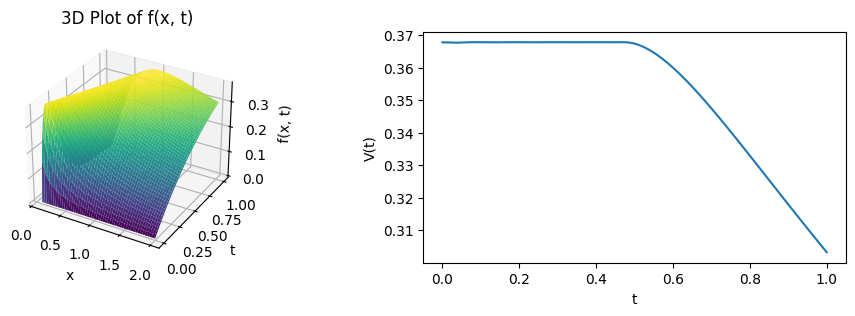

In [22]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 100)
g = lambda z: z * np.exp(-z)
f = lambda x, t: g(t / x)

# Create a meshgrid for x and t
x = np.linspace(0.1, 2, 100)
t = np.linspace(0, 1, 100)
X, T = np.meshgrid(x, t)

# Compute Z values
Z = f(X, T)

# Create a 3D plot
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, T, Z, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('f(x, t)')
ax.set_title('3D Plot of f(x, t)')

V = np.max(Z, axis=0)
ax = fig.add_subplot(122)
ax.plot(t, V, label='V')
ax.set_xlabel('t')
ax.set_ylabel('V(t)')

定理２の仮定は，価値関数がいたるところ微分可能であることは保証しません．しかし，上の例では，価値関数は右もしくは左側微分可能でした．
価値関数の微分可能性について何か言うために，次の関数のクラスを考えましょう．

---

**定義: equidifferentiable （同程度微分可能）**

関数のクラス$\{f(x, \cdot)\}_{x \in X}$は，次を満たす時に$t\in [0, 1]$でequidifferentiableであると言います．
「$\left(f\left(x, t^{\prime}\right)-f(x, t)\right) /\left(t^{\prime}-t\right)$が$t'\to t$で一様収束する」

---

* $X$が無限集合ならば，$X$での一様収束は，各点収束よりも強い条件です．つまり，同程度微分可能性は微分可能性よりも強い条件です．
* 同程度微分可能性の単純な十分条件は，$\{\partial_t f(x, \cdot)\}_{x \in X}$がいたるところで同程度連続であることです．
    * 実際，平均値の定理から，$\left(f\left(x, t^{\prime}\right)-f(x, t)\right) /\left(t^{\prime}-t\right)=\partial_t f(x, s)$なる$s \in [t, t']$が存在し，同程度連続性から，$\partial_t f(x, t)$が$t' \to t$で一様収束します．


同程度微分可能な$f$について，次が言えます．

---

**定理３**

* $\{\partial_t f(x, \cdot)\}_{x \in X}$が$t_0 \in [0, 1]$で同程度微分可能であるとします．
    * また，$\sup _{x \in X}\left|\partial_t f\left(x, t_0\right)\right|<+\infty$ かつ $X^*(t) \neq \varnothing$ for all $t$.

このとき，$V$は$t_0$で左-右側微分可能です．さらに，任意の$x^*(t) \in X^*(t)$について，その方向微分は次で与えられます：
$$
\begin{array}{ll}
V^{\prime}\left(t_0+\right)=\lim _{t \rightarrow t_0+} \partial_t f\left(x^*(t), t_0\right) & \text { for } \quad t_0<1 \\
V^{\prime}\left(t_0-\right)=\lim _{t \rightarrow t_0-} \partial_t f\left(x^*(t), t_0\right) & \text { for } \quad t_0>0 .
\end{array}
$$

そして，$\partial_t f\left(x^*(t), t_0\right)$が$t=t_0$で連続な時かつその時に限り，$V$が$t_0$で微分可能です．

**証明**

$V$の定義と$\partial_t f$の有界性の仮定から，同程度微分可能性より，

$$
\begin{aligned}
\left|V(t)-V\left(t_0\right)\right| & \leq \sup _{x \in X}\left|f(x, t)-f\left(x, t_0\right)\right| \\
& \leq \sup _{x \in X}\left|\partial_t f\left(x, t_0\right)\right| \cdot\left|t-t_0\right|+o\left(t-t_0\right) \rightarrow 0 \quad \text { as } \quad t \rightarrow t_0
\end{aligned}
$$

が言えます．
よって，$\{f(x, \cdot)\}_{x \in X}$は$t_0$で同程度連続であり，$V$は$t_0$で連続です．

$t_0<t^{\prime}<t^{\prime \prime}$を考えましょう．このとき，
$$
\begin{aligned}
\frac{f\left(x^*\left(t^{\prime}\right), t^{\prime \prime}\right)-f\left(x^*\left(t^{\prime}\right), t^{\prime}\right)}{t^{\prime \prime}-t^{\prime}} & \leq \frac{V\left(t^{\prime \prime}\right)-V\left(t^{\prime}\right)}{t^{\prime \prime}-t^{\prime}} \\
& \leq \frac{f\left(x^*\left(t^{\prime \prime}\right), t^{\prime \prime}\right)-f\left(x^*\left(t^{\prime \prime}\right), t^{\prime}\right)}{t^{\prime \prime}-t^{\prime}}
\end{aligned}
$$
が成り立ちます．
また，$t'\to t_0+$についてlimsupをとると，同程度連続性から，
$$
\begin{aligned}
\varlimsup_{t^{\prime} \rightarrow t_0+} & \frac{f\left(x^*\left(t^{\prime}\right), t^{\prime \prime}\right)-f\left(x^*\left(t^{\prime}\right), t_0\right)}{t^{\prime \prime}-t_0}
\end{aligned} \leq \frac{V\left(t^{\prime \prime}\right)-V\left(t_0\right)}{t^{\prime \prime}-t_0}
$$
が成立します．さらに，
$$
\begin{aligned}
\varlimsup_{t^{\prime} \rightarrow t_0+} \partial_t f\left(x^*\left(t^{\prime}\right), t_0\right)+\frac{o\left(t^{\prime \prime}-t_0\right)}{t^{\prime \prime}-t_0} & \leq \frac{V\left(t^{\prime \prime}\right)-V\left(t_0\right)}{t^{\prime \prime}-t_0} \\
& \leq \partial_t f\left(x^*\left(t^{\prime \prime}\right), t_0\right)+\frac{o\left(t^{\prime \prime}-t_0\right)}{t^{\prime \prime}-t_0}
\end{aligned}
$$
も成立します．これで１番目の証明終わりです．
２個目と３個目は同様にして証明できます．

---

**ポイント** 実は，同程度微分可能性はめっちゃ大事です．実際，「任意の$x$で$f(x, t)$が$t$について微分可能」だけでは不十分です．
例として，
* $X = \{1, 2, \dots\}$
* $f(x, t)=\left\{\begin{array}{cl}t \sin \log t & \text { if } t>t(x), \\ -t & \text { if } t \leq t(x),\end{array} \quad\right.$ where $t(x)=\exp \{-\pi / 2-2 \pi x\}$

を考えてみましょう．

このとき，$V(t)=t \sin \log t$です．また，$f(x, t)$は任意の$x$で$t$について微分可能です
しかし，$t_0=0$では$\{f(x, \cdot)\}_{x \in X}$が同程度微分可能ではありません：

$$
\sup _{x \in X}\left|\frac{f(x, t)-f(x, 0)}{t-0}-\partial_t f(x, 0)\right|=\sin \log t+1 \nrightarrow 0 \quad \text { as } \quad t \rightarrow 0 .
$$

そして，$V$は$t=0$で微分可能ではありません．実際，
$$
\varlimsup_{t \rightarrow 0+}[V(t) / t]=1 \neq \varliminf_{t \rightarrow 0+}[V(t) / t]=-1 .
$$

よって，$V$の微分可能性について言うためには，同程度微分可能性が大事になります．

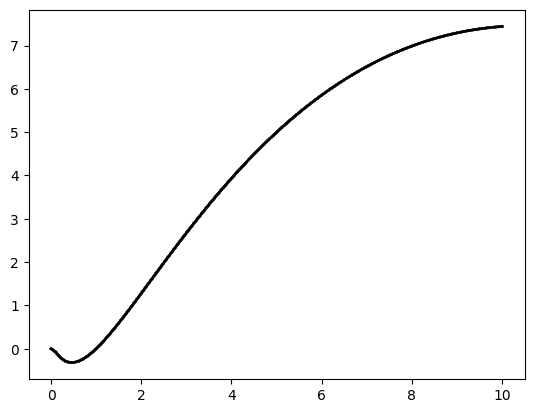

In [39]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(1e-3, 10, 100)

def f(x, t):
    tx = np.exp(-np.pi / 2 - 2 * np.pi * x)
    return np.where(t > tx, t * np.sin(np.log(t)), -t)


for x in range(100):
    fx = f(x, t)
    plt.plot(t, fx, label=f'x={x}')

Vt = t * np.sin(np.log(t))
plt.plot(t, Vt, label='V(t)', color='black', linewidth=2)